Dimensionality of the vector space: 3
Number of vectors in the vector space: 10
Rank of Matrix A: 3
Cost of each product available for sale: [[ 1.]
 [55.]
 [18.]]
Model vector X for predicting the cost of products: [[ 1.]
 [55.]
 [18.]]
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

        POOR       0.50      1.00      0.67         1
        RICH       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


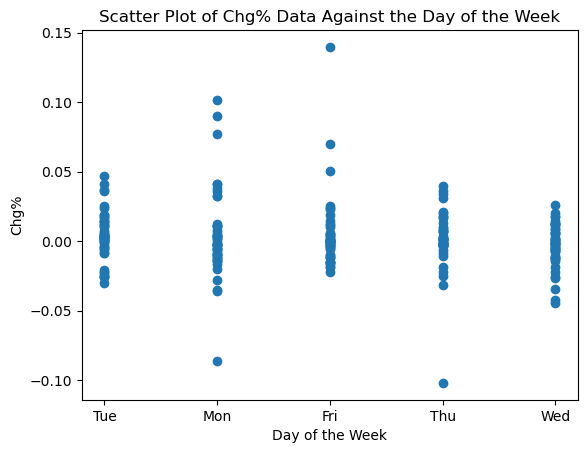

Mean of Price data: 1560.663453815261
Variance of Price data: 58732.365352539186
Sample mean of Price data for Wednesdays: 1550.706
Sample mean of Price data for the month of April: 1698.9526315789474
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional probability of making profit, given that today is Wednesday: 0.0084


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import statistics

# Load the data from the Excel file
df = pd.read_excel('Lab Session1 Data.xlsx', sheet_name='Purchase data')
def first_question():


    # Extracting the columns relevant for matrices A and C
    A = df.iloc[:, 1:4].to_numpy()  # Selecting columns with candies, mangoes, and milk packets
    C = df.iloc[:, 4].to_numpy().reshape(-1, 1)  # Selecting the payment column and reshaping to a column vector

    # Activities
    # 1. Dimensionality of the vector space
    dimensionality = A.shape[1]  # Number of columns in matrix A

    # 2. Number of vectors in the vector space
    numvect = A.shape[0]  # Number of rows in matrix A

    # 3. Rank of Matrix A
    rank_A = np.linalg.matrix_rank(A)

    # 4. Using Pseudo-Inverse to find the cost of each product available for sale
    pseudoinvA = np.linalg.pinv(A)
    cost_per_product = np.dot(pseudoinvA, C)

    # Displaying results
    print("Dimensionality of the vector space:", dimensionality)
    print("Number of vectors in the vector space:", numvect)
    print("Rank of Matrix A:", rank_A)
    print("Cost of each product available for sale:", cost_per_product)
    return cost_per_product

def second_question(cost_per_product):

    # Displaying the result
    print("Model vector X for predicting the cost of products:", cost_per_product)

def third_question():


    # marked customers with payments above Rs. 200 as 'RICH' and others as 'POOR'

    # Mark customers as RICH or POOR based on payments
    df['Category'] = df['Payment (Rs)'].apply(lambda x: 'RICH' if x > 200 else 'POOR')

    # Extracting features and target variable
    X = df.iloc[:, 1:4]  # Features: Candies, Mangoes, Milk Packets
    y = df['Category']  # Target: RICH or POOR

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing features
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Creating and training the K-NN classifier model
    knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
    knn_classifier.fit(X_train_std, y_train)

    # Predicting the categories for the test set
    y_pred = knn_classifier.predict(X_test_std)

    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Displaying the results
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)

def fourth_question():
    # Load the data into a DataFrame
    # Assuming 'data' is the variable containing the DataFrame
    # Update the file path and sheet name based on your actual file structure
    data = pd.read_excel('Lab Session1 Data.xlsx', sheet_name='IRCTC Stock Price')

    # Calculate mean and variance of the Price data
    mean_price = statistics.mean(data['Price'])
    variance_price = statistics.variance(data['Price'])

    # Select price data for Wednesdays and calculate sample mean
    wednesday_data = data[data['Day'] == 'Wed']
    sample_mean_wednesday = statistics.mean(wednesday_data['Price'])

    # Select price data for the month of Apr and calculate sample mean
    april_data = data[data['Date'].str.contains('Apr')]  # Assuming the data is for April
    sample_mean_april = statistics.mean(april_data['Price'])

    # Probability of making a loss
    loss_probability = len(data[data['Chg%'] < 0]) / len(data['Chg%'])

    # Probability of making a profit on Wednesday
    profit_wednesday_probability = len(wednesday_data[wednesday_data['Chg%'] > 0]) / len(wednesday_data['Chg%'])

    # Conditional probability of making a profit, given that today is Wednesday
    conditional_profit_probability = profit_wednesday_probability / len(wednesday_data['Chg%'])

    # Scatter plot of Chg% data against the day of the week
    # Assuming 'plt' is the variable for the plotting library
    plt.scatter(data['Day'], data['Chg%'])
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Scatter Plot of Chg% Data Against the Day of the Week')
    plt.show()

    # Print the results
    print(f"Mean of Price data: {mean_price}")
    print(f"Variance of Price data: {variance_price}")
    print(f"Sample mean of Price data for Wednesdays: {sample_mean_wednesday}")
    print(f"Sample mean of Price data for the month of April: {sample_mean_april}")
    print(f"Probability of making a loss: {loss_probability}")
    print(f"Probability of making a profit on Wednesday: {profit_wednesday_probability}")
    print(f"Conditional probability of making profit, given that today is Wednesday: {conditional_profit_probability}")

cost_per_product = first_question()
second_question(cost_per_product)
third_question()
fourth_question()